In [6]:
import numpy as np
import pandas as pd

from src.M4_data import prepare_M4_data
from src.M4_experiment import plot_model_prediction, evaluate_model_prediction
from src.ESRNN import ESRNN

In [2]:
X_train_df, y_train_df, X_test_df, y_test_df = prepare_M4_data('Quarterly', num_obs=5)
y_train_df

,unique_id,ds,y
0,Q1,1970-01-02,7407.412314
1,Q1,1970-01-03,7528.566074
2,Q1,1970-01-04,7374.709225
3,Q1,1970-01-05,7395.514848
4,Q1,1970-01-06,7654.007989
...,...,...,...
154,Q5,1970-02-25,1422.000000
155,Q5,1970-02-26,968.000000
156,Q5,1970-02-27,843.000000
157,Q5,1970-02-28,1241.000000


In [3]:
esrnn = ESRNN(max_epochs=0, batch_size=2, rnn_weight_decay=0.5)
# esrnn = ESRNN(max_epochs=2, batch_size=16, learning_rate=3e-4, per_series_lr_multip=1.5,
#               gradient_eps=1e-6, level_variability_penalty=100,
#               dilations=[[1,7],[28]], add_nl_layer=True,
#               seasonality=7, input_size=7, output_size=14)
esrnn.fit(X_train_df, y_train_df)

========== Training ESRNN ==========

Train finished! 



========= Predicting ESRNN =========



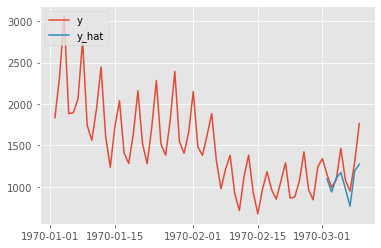

In [4]:
plot_model_prediction(y_train_df, X_test_df, y_test_df, model=esrnn, u_id='Q5')

In [5]:
model_owa = evaluate_model_prediction(y_train_df, X_test_df, y_test_df, model=esrnn)

========= Predicting ESRNN =========

== Overall Weighted Average:2.334 ==
